<a href="https://colab.research.google.com/github/mattzcarey/automotive-eng/blob/main/visual_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
#some functions
import numpy as np
import math

def generate_semicircle(centre_x, centre_y, radius, stepsize=0.1):  

    x = np.arange(centre_x, centre_x+radius+stepsize, stepsize)
    y = np.sqrt(np.abs(radius**2 - (x - centre_x)**2))

    # since each x value has two corresponding y-values, duplicate x-axis.
    # [::-1] is required to have the correct order of elements for plt.plot. 
    x = np.concatenate([x,x[::-1]])

    # concatenate y and flipped y. 
    y = np.concatenate([y,-y[::-1]])

    return x, y + centre_y


In [31]:
def genCors():

  #gen coordinates starting at first corner.
  y = []
  x = []

  #1 = accel, 2 = decell, 3 = steady state
  s = []

  #circle1
  xc1, yc1 = generate_semicircle(500, 0, 50, 1)

  sc1 = np.full_like(xc1, 3)

  x = np.append(x,xc1)
  y = np.append(y,yc1)
  s = np.append(s, sc1)

  #straight 1
  m2 = -25/500
  s1change = 76.4602210071385

  xl2 = list(range(0, 501,1))
  sc2 = np.full_like(xl2, 1)
  sc2[0:xl2.index(math.ceil(s1change))] = 2

  xl2.reverse()
  sc2 = np.flipud(sc2)

  yl2 = [(i*m2)-25 for i in xl2]

  x = np.append(x, xl2)
  y= np.append(y, yl2)
  s = np.append(s, sc2)

  #circle 2
  xc2, yc2 = generate_semicircle(0, 0, 25, 1)
  sc3 = np.full_like(xc2, 3)

  x = np.append(x, (xc2*-1))
  y = np.append(y, np.flipud(yc2))
  s = np.append(s, sc3)


  #straight 2
  m1 = 25/500
  s4change = 440.1916060346269

  xl1 = list(range(0, 501,1))
  yl1 = [(i*m1)+25 for i in xl1]
  sc4 = np.full_like(xl1, 2)
  sc4[0:xl1.index(math.ceil(s4change))] = 1

  x = np.append(x, xl1)
  y = np.append(y, yl1)
  s = np.append(s, sc4)

  return x,y,s


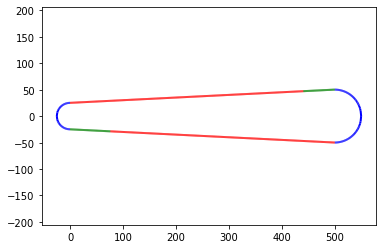

In [32]:
#plot x and y
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.collections import LineCollection

x,y,s = genCors()

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([0, 1.5, 2.5, 3], cmap.N)

lc = LineCollection(segments, cmap=cmap, norm=norm, linewidths=2)
lc.set_array(s)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.axis("equal")
plt.show()